In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Different classification based on idea with spike on 100

In [2]:
df=pd.read_csv('../input/petfinder-pawpularity-score/train.csv')

In [3]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [4]:
df["img"] = df["Id"].apply(lambda x:x+ ".jpg")

In [5]:
df=df[['img', 'Pawpularity']]

In [6]:
df[df['Pawpularity']>=90]

,img,Pawpularity
15,0067aaaa500b530c76b9c91af34b4cb8.jpg,98
19,00768659c1c90409f81dcdecbd270513.jpg,100
44,0117f444e6118619c4f6492cba703177.jpg,95
50,013f86ed0e765b189990d3d5ac28bd7d.jpg,100
86,0254f54b148543442373d5aad45b2d1a.jpg,100
...,...,...
9797,fce5c86414b1c60b7af20ddbb8510d83.jpg,94
9836,fde75ba22f491d31c9267e59f6cbfe1a.jpg,100
9843,fe200aff478f55ca4bcf77d9dade1217.jpg,100
9873,feb371403a5f656fd8a0ca434d845f2d.jpg,96


In [7]:
df[df['Pawpularity']<90]

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,63
1,0009c66b9439883ba2750fb825e1d7db.jpg,42
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,28
3,0018df346ac9c1d8413cfcc888ca8246.jpg,15
4,001dc955e10590d3ca4673f034feeef2.jpg,72
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,15
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,70
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,20
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,20


In [29]:
df_new=df.copy()

Let's drop images with Pawpularity = 100

In [30]:
#df_new.drop(df[df_new['Pawpularity']==100].index, inplace=True) 

In [31]:
#df_new.index=np.arange(0,9423)

In [32]:
df_new.loc[(df_new.Pawpularity<50), 'Pawpularity']=0

In [33]:
df_new.loc[(df_new.Pawpularity>=50), 'Pawpularity']=1

In [34]:
#df_new.loc[(df_new.Pawpularity<100), 'Pawpularity']=0

In [35]:
df_new

,img,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0.jpg,1
1,0009c66b9439883ba2750fb825e1d7db.jpg,0
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,0
3,0018df346ac9c1d8413cfcc888ca8246.jpg,0
4,001dc955e10590d3ca4673f034feeef2.jpg,1
...,...,...
9704,ffbfa0383c34dc513c95560d6e1fdb57.jpg,0
9705,ffcc8532d76436fc79e50eb2e5238e45.jpg,1
9706,ffdf2e8673a1da6fb80342fa3b119a20.jpg,0
9707,fff19e2ce11718548fa1c5d039a5192a.jpg,0


In [36]:
df_new[df_new['Pawpularity']==0]

,img,Pawpularity
1,0009c66b9439883ba2750fb825e1d7db.jpg,0
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,0
3,0018df346ac9c1d8413cfcc888ca8246.jpg,0
6,0023b8a3abc93c712edd6120867deb53.jpg,0
7,0031d6a9ef7340f898c3e05f92c7bb04.jpg,0
...,...,...
9703,ffb8b466494a3e48bcb874a2fe9b976d.jpg,0
9704,ffbfa0383c34dc513c95560d6e1fdb57.jpg,0
9706,ffdf2e8673a1da6fb80342fa3b119a20.jpg,0
9707,fff19e2ce11718548fa1c5d039a5192a.jpg,0


In [37]:
#df_new.loc[(df_new.Pawpularity>=50), 'Pawpularity']=1

In [38]:
df_1=df_new[df_new['Pawpularity']==0].head(2000)

In [39]:
df_2=df_new[df_new['Pawpularity']==1]#.head(1000)

In [40]:
df_sum=pd.concat([df_1, df_2])

In [41]:
df_sum=df_sum.sample(frac=1)

In [42]:
df_sum

,img,Pawpularity
105,03037d786fb0c392410d2d031ec3bc40.jpg,0
7546,c70b3ef59d2077456fb44269520495c2.jpg,1
4874,80343c67dce7506b83b106948672cbba.jpg,1
50,013f86ed0e765b189990d3d5ac28bd7d.jpg,1
1406,24f7755f936686dc69a1dd7b163ad4b8.jpg,0
...,...,...
2308,3cc2540601f4afdeecc71d0f2c84678f.jpg,1
1271,215d552ffa96127d0cee430d3d8c96de.jpg,0
260,075fb8a1c0f70523b122352598dc246e.jpg,1
806,14ca7fc6329aec72a19a2a1cffc4db7f.jpg,0


In [43]:
df_sum.index=np.arange(0,4079)

In [44]:
df_sum

,img,Pawpularity
0,03037d786fb0c392410d2d031ec3bc40.jpg,0
1,c70b3ef59d2077456fb44269520495c2.jpg,1
2,80343c67dce7506b83b106948672cbba.jpg,1
3,013f86ed0e765b189990d3d5ac28bd7d.jpg,1
4,24f7755f936686dc69a1dd7b163ad4b8.jpg,0
...,...,...
4074,3cc2540601f4afdeecc71d0f2c84678f.jpg,1
4075,215d552ffa96127d0cee430d3d8c96de.jpg,0
4076,075fb8a1c0f70523b122352598dc246e.jpg,1
4077,14ca7fc6329aec72a19a2a1cffc4db7f.jpg,0


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [47]:
training, validation = train_test_split(df_sum, test_size = 0.25, random_state=17)

In [48]:
X_train=training['img']
X_val=validation['img']
y_train=training['Pawpularity']
y_val=validation['Pawpularity']

In [49]:
training[training.Pawpularity==0]

,img,Pawpularity
2400,37cd6b655c64771d389cc38c194e12ba.jpg,0
3506,0223b44b4998dd781dcc7d747489794e.jpg,0
569,12ecff666b579349f10fb08ed794a7fc.jpg,0
1874,20d17c068d0be47b689cf3bc48ce335d.jpg,0
3505,380dd0623e9d04e43abb074b9305fa95.jpg,0
...,...,...
1964,06056c036db13114e7d665fe45cb58f8.jpg,0
468,2ca9aa3977de98fd42173ac4aa2557bb.jpg,0
1055,1103c38cb4d9553da52a905da0d8d45c.jpg,0
2800,214f5556e124b1f7e4a6744de0ad10ed.jpg,0


In [50]:
validation[validation.Pawpularity==0]

,img,Pawpularity
465,1d615ce5d3214bdbaed24e85c422b6ef.jpg,0
2094,19460b81b5a474ee8869ae13ad21aba1.jpg,0
3306,142c16abf25979386d3e799fe4567502.jpg,0
132,2592e947e5b30ae88b36cd96c9909fa4.jpg,0
3703,16857226b927e6e8a801bf3bf34e1022.jpg,0
...,...,...
2277,2f44858c3ff46f6d55b779f058e65bbe.jpg,0
734,0e8b285557ca100e5d8545e38c903c54.jpg,0
2418,2948c499d7d3c2febb647ee086c3822c.jpg,0
1002,41173f1cd5ed41aa11cb344b3b27a436.jpg,0


In [51]:
class PetfinderDataset(Dataset):
    def __init__(self, dataframe, data_path, transform=None, target_transform=None):
        self.dataframe=dataframe
        self.data_path=data_path
        self.transform=transform
        self.target_transform=target_transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        img_name=self.dataframe['img'].iloc[idx]
        img=Image.open(os.path.join(self.data_path, img_name))
        img=self.transform(img)
        label=self.dataframe['Pawpularity'].iloc[idx]
        return img, label

In [52]:
image_size = 224 

transform = transforms.Compose([
    transforms.Resize(255), 
    transforms.CenterCrop(image_size),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

transform_val=transforms.Compose([
    transforms.Resize(255),                                       
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [53]:
dataset_train = PetfinderDataset(training, TRAIN_PATH, transform=transform)
dataloader_train = DataLoader(dataset_train, batch_size=64)
dataset_val=PetfinderDataset(validation, TRAIN_PATH, transform=transform_val)
dataloader_val=DataLoader(dataset_val, batch_size=64)

tensor([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])


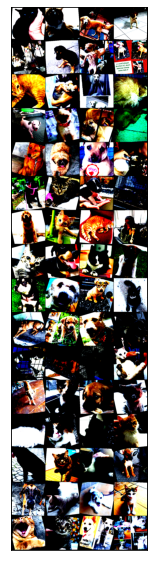

In [54]:
from torchvision.utils import make_grid

for images, labels in dataloader_train:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    print(labels)
    break

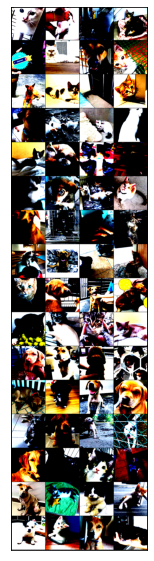

In [55]:
for images, labels in dataloader_val:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

In [56]:
from torchvision import models


In [57]:
pip install pretrainedmodels

     |████████████████████████████████| 58 kB 494 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=6b5024639039f625cea521ca0767fa14fc4f4d963558a181c30a6baa5666b4fa
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pretrainedmodels

In [59]:
resnet = models.resnet50(pretrained=True)
#resnet=resnet(include_top=False, weights='imagenet')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [60]:

num_ftrs = resnet.fc.in_features
print(num_ftrs)
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#resnet.fc = nn.Linear(num_ftrs, 2)

resnet.fc = nn.Sequential(
    nn.Linear(num_ftrs, 256),
    nn.Dropout(0.6),
    nn.ReLU(inplace=True),
    #nn.Dropout(0.25),
    nn.Linear(256, 2),
    nn.Sigmoid()
)


2048


In [61]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [62]:
#CUDA_LAUNCH_BLOCKING=1.

In [63]:
#CUDA_LAUNCH_BLOCKING=1
train_on_gpu = torch.cuda.is_available()
if train_on_gpu:
    resnet.cuda()   
        

In [64]:
import torch.optim as optim

# specify loss function
criterion = torch.nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(resnet.parameters(), lr = 0.000001)

In [65]:
def accuracy(preds, trues):
    ### Converting preds to 0 or 1

    preds = [0 if preds[i][0]>=preds[i][1] else 1 for i in range(len(preds))]
    ### Calculating accuracy by comparing predictions with true labels
    acc = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
    ### Summing over all correct predictions
    acc = np.sum(acc) / len(preds)
    #print(acc)
    return (acc * 100)
    #return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [66]:
import sklearn.metrics

In [67]:
def other_metrics(preds,trues):
    #print(preds)

    y_pred = [0 if preds[i][0]>=preds[i][1] else 1 for i in range(len(preds))]
    #y_pred = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
    
    #y_pred = np.array(y_pred)# List to Numpy.Arra
    #y_pred = torch.from_numpy(y_pred) # array2tensor
    #y_pred.get_device()
    #y_pred.cuda()
    #print(y_pred)
    #print(trues)
    trues= trues.to('cpu').numpy()
    #trues=trues.cpu()
    #print(trues)
    #print(y_pred)
    
    
    r=sklearn.metrics.confusion_matrix(trues, y_pred)
    precision = sklearn.metrics.precision_score(trues, y_pred)
    recall = sklearn.metrics.recall_score(trues, y_pred)
    
    return r, precision, recall 

In [68]:
n_epochs = 10
valid_loss_min=np.Inf
train_loss_list=[]
val_loss_list=[]

for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    valid_loss = 0.0
    
    resnet.train()
    for data, target in dataloader_train:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = resnet(data)
        #print(output)
        loss = criterion(output, target)
        acc_train=accuracy(output, target)
        matrix_tr, precision_tr, recall_tr=other_metrics(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
        
    resnet.eval()
    
    for data, target in dataloader_val:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        output = resnet(data)
        loss = criterion(output, target)
        acc_val=accuracy(output, target)
        matrix_val, precision_val, recall_val=other_metrics(output, target)
        valid_loss += loss.item()*data.size(0)
        
    
    train_loss = train_loss/len(dataloader_train.dataset)
    train_loss_list.append(train_loss)
    valid_loss = valid_loss/len(dataloader_val.dataset)
    val_loss_list.append(valid_loss)

    
    print('Epoch: {} \tTraining Loss: {:.6f} \t Training Accuracy: {:.6f} \t Validation Loss: {:.6f} Validation Accuracy: {:.6f}'.format(
        epoch, train_loss, acc_train, valid_loss, acc_val))
    
    print('Train metrics.\n Confusion Matrix:{} \t Precision: {}\t Recall {}'.format( matrix_tr, precision_tr, recall_tr))
    print('Validation metrics.\n Confusion Matrix:{} \t Precision: {}\t Recall {}'.format( matrix_val, precision_val, recall_val))
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(resnet.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss
    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 	Training Loss: 0.694990 	 Training Accuracy: 54.901961 	 Validation Loss: 0.693071 Validation Accuracy: 46.666667
Train metrics.
 Confusion Matrix:[[20  6]
 [17  8]] 	 Precision: 0.5714285714285714	 Recall 0.32
Validation metrics.
 Confusion Matrix:[[27  0]
 [32  1]] 	 Precision: 1.0	 Recall 0.030303030303030304
Validation loss decreased (inf --> 0.693071).  Saving model ...
Epoch: 2 	Training Loss: 0.693453 	 Training Accuracy: 60.784314 	 Validation Loss: 0.692127 Validation Accuracy: 53.333333
Train metrics.
 Confusion Matrix:[[22  4]
 [16  9]] 	 Precision: 0.6923076923076923	 Recall 0.36
Validation metrics.
 Confusion Matrix:[[27  0]
 [28  5]] 	 Precision: 1.0	 Recall 0.15151515151515152
Validation loss decreased (0.693071 --> 0.692127).  Saving model ...
Epoch: 3 	Training Loss: 0.691995 	 Training Accuracy: 60.784314 	 Validation Loss: 0.691179 Validation Accuracy: 51.666667
Train metrics.
 Confusion Matrix:[[20  6]
 [14 11]] 	 Precision: 0.6470588235294118	 Recall 0.44

In [69]:
print(train_loss_list)
print(val_loss_list)

[0.6949895916323368, 0.6934526839377874, 0.691994639754724, 0.6911857174907334, 0.6902833060721004, 0.6869939422638598, 0.6867397420349445, 0.6857415092813692, 0.6827816511922975, 0.6816113129789122]
[0.6930708515877817, 0.6921273986498515, 0.6911790211995442, 0.6902166329178155, 0.6891558848175348, 0.6880056813651441, 0.6867630685076994, 0.6854671001434326, 0.6840117898641848, 0.6824407423243803]


In [70]:
def plot_losses(train_losses, val_losses):
    #train_losses = [x.get('train_loss') for x in history]
    #val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

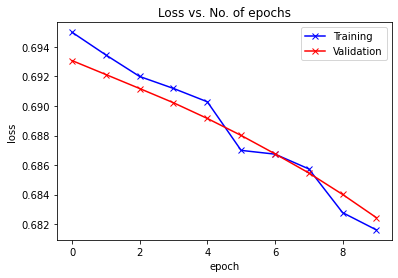

In [71]:
plot_losses(train_loss_list, val_loss_list)